## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Muhammad Ihza Mahendra <br> 
<b>NIM<b>: 1301174682

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
3. Batas akhir submit file adalah 1 November 2020 pukul 21:00.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

/home/kratos/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


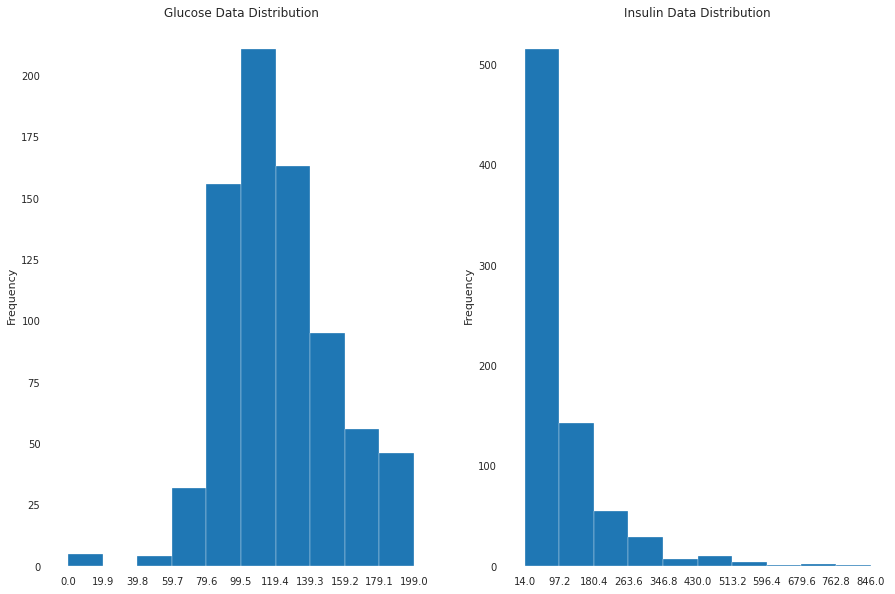

In [1]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import pandas_profiling as ps

data = pd.read_csv('diabetes.csv')
data.dropna(inplace = True, axis = 0)
data.loc[ data['Insulin'] == 0 | np.isnan(data['Insulin']), 'Insulin' ] = data['Insulin'].median()

fig = pyplot.figure(figsize=(15,10))

# we are creating subplot because we will visualize both glucose and insulin
ax = fig.add_subplot(1, 2, 1)
ax0 = fig.add_subplot(1, 2, 2)



count, bin0 = np.histogram(data['Glucose'], 10)
data['Glucose'].plot(kind = 'hist', bins = 10, xticks = bin0, ax = ax)
ax.set_title('Glucose Data Distribution')

count, bin0 = np.histogram(data['Insulin'], 10)
data['Insulin'].plot(kind = 'hist', bins = 10, xticks = bin0, ax = ax0)
ax0.set_title('Insulin Data Distribution')

pyplot.show()

In [2]:
ps.ProfileReport(data[['Glucose', 'Insulin']])

/home/kratos/.local/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Penjelasan
for more insight about the data distribution or anything about these 2 feature, you can refer to pandas profiling up here, but for the explanation about the histogram of distribution data of Glucose and Insulin, the highest and the most frequent data is on between 99 to 119, but the highest is on 199 for glucose, the histogram shows that Glucose not skew to left and right but in the middle, the data shows that most of the recorded patient has a high number of glucose, but its different with insulin feature that skew to left that shows the correlation with glucose, the higher number the patient that has high glucose on blood, means that the lower they produce insulin, most of the recorded data on Insulin feature show large number of patient with low insulin around 14, when it goes higher number at x axis, the frequency going down.


### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

In [3]:
# type your code here
# i. correlation between variables
# %matplotlib qt
correlations = data.corr(method = 'pearson')
type(correlations)
correlations
correlations.style.background_gradient(cmap='coolwarm').set_precision(2) # Pandas Version

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.36,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.40,0.39,0.18,-0.11,0.07
Insulin,-0.06,0.36,0.09,0.40,1.00,0.20,0.18,-0.02,0.15
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.18,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.02,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.15,0.29,0.17,0.24,1.00


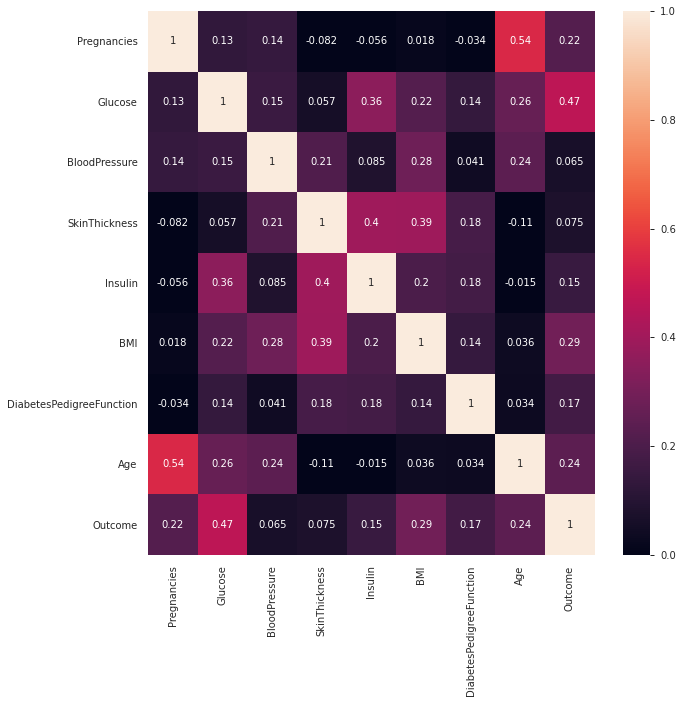

In [4]:
pyplot.figure(figsize=(10,10))
ax = sns.heatmap(correlations, annot=True, vmin=0, vmax=1)

In [5]:
# ii. correlation between variables and target
correlations[['Outcome']].style.background_gradient(cmap='coolwarm').set_precision(2)

,Outcome
Pregnancies,0.22
Glucose,0.47
BloodPressure,0.07
SkinThickness,0.07
Insulin,0.15
BMI,0.29
DiabetesPedigreeFunction,0.17
Age,0.24
Outcome,1.00


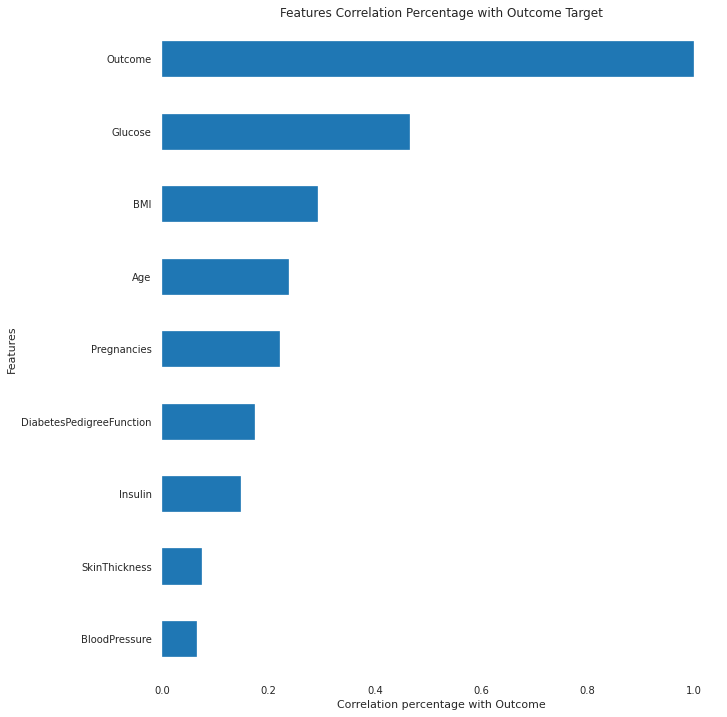

In [6]:
correlation = data[data.columns[0:]].corr()['Outcome'][:]
pyplot.figure(figsize=(10,12))
correlation.sort_values().plot(kind='barh')
pyplot.title('Features Correlation Percentage with Outcome Target')
pyplot.ylabel('Features')
pyplot.xlabel('Correlation percentage with Outcome')
pyplot.show()


In [7]:
type(correlation)

pandas.core.series.Series

#### Penjelasan 
- i. The correlation plot of (i) shows that the relation between the available features:
    - Glucose,Age,BMI and Pregnancies are the most correlated variable with the Outcome.
    - Insulin and DiabetesPedigreeFunction have low correlation with the outcome.
    - BloodPressure and SkinThickness have low correlation with the outcome.
    - And there is a low correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and          Skin Thickness,Insulin and Glucose.
    
    
- ii. Glucose,Age,BMI and Pregnancies are the most correlated variables with the Outcome target variable.     These features can be used as a feature to be processed in data mining as Outcome dependent on them.


### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

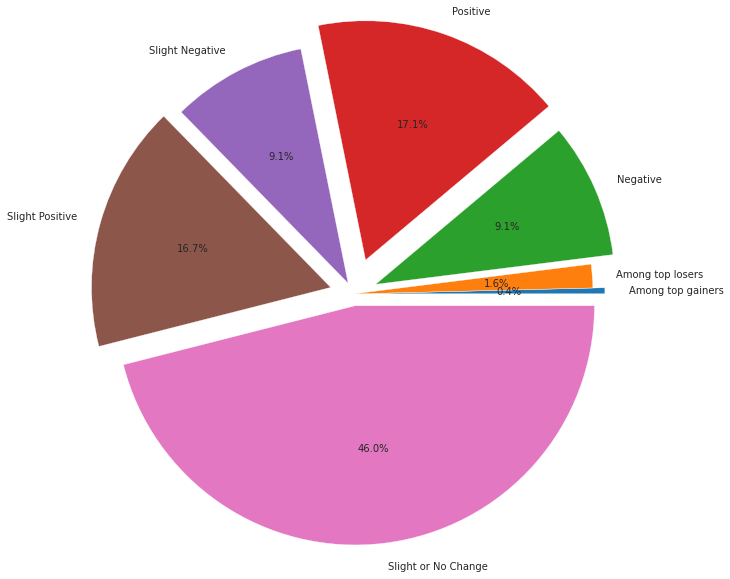

In [8]:
# type your code here
N_data = pd.read_csv("Nasdaq.csv")
H_data = pd.read_csv("Hang_Seng.csv")
Ni_data = pd.read_csv("Nikkei.csv")

N_data = N_data.dropna(axis = 0)
H_data = H_data.dropna(axis = 0)
Ni_data = Ni_data.dropna(axis = 0)


def Trend(val):
    if val > -0.5 and val <= 0.5 :
        return 'Slight or No Change'
    elif val > 0.5 and val <= 1 :
        return 'Slight Positive'
    elif val > -1 and val <= -0.5 :
        return 'Slight Negative'
    elif val > 1 and val <= 3:
        return 'Positive'
    elif val > -3 and val <= -1 :
        return 'Negative'
    elif val > 3 and val <= 7:
        return 'Among top gainers'
    elif val > -7 and val <= -3:
        return 'Among top losers'
    elif x > 7 :
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
    
N_data['Date'] = pd.to_datetime(N_data['Date'])
H_data['Date'] = pd.to_datetime(H_data['Date'])
Ni_data['Date'] = pd.to_datetime(Ni_data['Date'])

N_data.index = N_data["Date"]
H_data.index = H_data["Date"]
Ni_data.index = Ni_data["Date"]

N_data['DPC'] = N_data['Adj Close'].pct_change()*100
H_data['DPC'] = H_data['Adj Close'].pct_change()*100
Ni_data['DPC'] = Ni_data['Adj Close'].pct_change()*100

N_data = N_data.dropna(axis = 0)
H_data = H_data.dropna(axis = 0)
Ni_data = Ni_data.dropna(axis = 0)

N_data = N_data['2019-01-01' : '2019-12-31']
H_data = H_data['2019-01-01' : '2019-12-31']
Ni_data = Ni_data['2019-01-01' : '2019-12-31']


N_data['trend'] = N_data['DPC'].apply(lambda val : Trend(val))
H_data['trend'] = H_data['DPC'].apply(lambda val : Trend(val))
Ni_data['trend'] = Ni_data['DPC'].apply(lambda val : Trend(val))

NP = N_data.groupby('trend')
HP = H_data.groupby('trend')
NIP= Ni_data.groupby('trend')

NP_label = sorted([x for x in N_data.loc[:, 'trend'].unique()])
HP_label = sorted([x for x in H_data.loc[:, 'trend'].unique()])
NIP_label = sorted([x for x in Ni_data.loc[:, 'trend'].unique()])

pyplot.pie(NP['trend'].count(), labels = NP_label, autopct = '%1.1f%%',
           explode = (0.1, 0.0, 0.2, 0.3, 0.1, 0.2, 0.1),radius = 2)

pyplot.show()

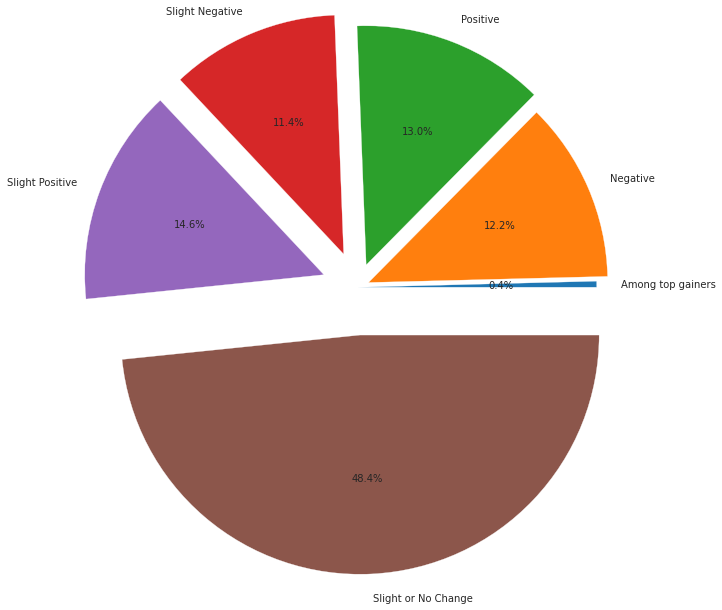

In [9]:
pyplot.pie(HP['trend'].count(), labels = HP_label, autopct = '%1.1f%%', 
            explode = (0.0, 0.1, 0.2, 0.3, 0.3, 0.4), radius = 2)

pyplot.show()

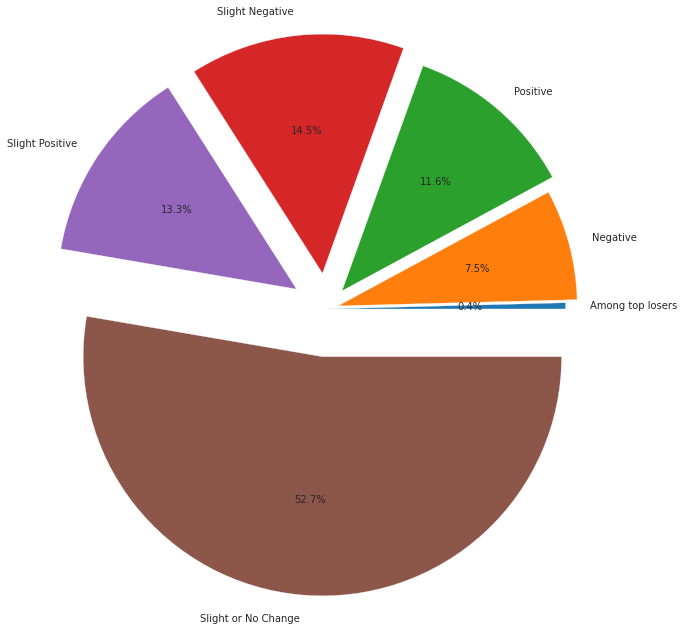

In [10]:
pyplot.pie(NIP['trend'].count(), labels = NIP_label, autopct = '%1.1f%%', 
           explode = (0.0, 0.1, 0.2, 0.3, 0.3, 0.4), radius = 2)

pyplot.show()

#### Penjelasan 
- Nasdaq : the smallest percentage is among top gainers = 0.4% and for the biggest percentage is slight or no change = 46%, slightly positive and positive has a small difference, the same goes for slightly negative and negative with same percentage, for among top losers also small which is 1.6%, this is a 'good enough' stock for trading in my guess, the negative are smaller than positive and overall has a small chance of change, but if we judge from the volatility it is risky

- Hang Seng : the highest percentage is on slight or no change which is 48% and the  smallest is among top gainer which is 0.4%, we can see that the positive and slight positive are 1% higher than negative and slight negative, this is a little bit risky, and more riskier if you look in the volatility chart, but it is a 'not bad' stock for experienced stock trader, overall the change  are smaller because of the slight or no change percentage are the biggest

- Nikkei : with among top gainers as the smallest which is 0.4 and slight or no change as the biggest which is 52%, we can see also this stock are also risky more like Hang Seng, even though the positive are higher than negative, but the movement of slightly negative are higher than slight positive, and therefore need to be more careful to trade buy or sell in this stock. Try to look the volatility to judge more about the risk.

- note : from this trend perspective, we can see risk small or big, but also compare the risk with the volatility, and pie is the most match visualization for trend analysis to see their percentage of trend

### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

#### Code

<AxesSubplot:xlabel='Date'>

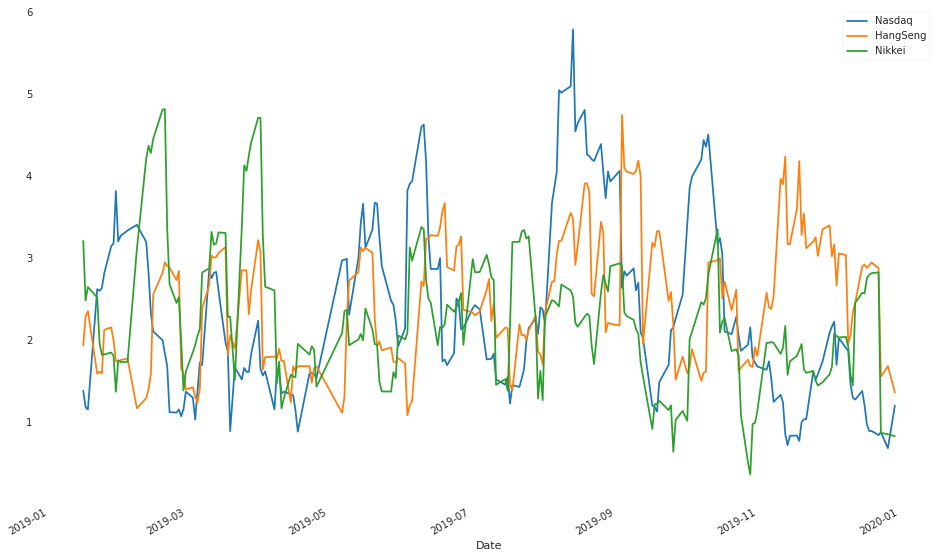

In [11]:
# type your code here
vol = pd.DataFrame()
vol['Nasdaq'] = N_data['Adj Close']
vol['HangSeng'] = H_data['Adj Close']
vol['Nikkei'] = Ni_data['Adj Close']
vol.dropna(inplace=True, axis = 0)

co_vol = vol.pct_change()*100
co_vol.dropna(inplace=True, axis = 0, how = 'any')

volatile = co_vol[['Nasdaq', 'HangSeng', 'Nikkei']].rolling(7).std()*np.sqrt(7)
volatile.plot(figsize=(16,10))

#### Penjelasan 
- As we know the terms of volatility in stock is the movement of price which is up or down more than 1%, the more volatile the more riskier the stock become.

- if we look the volatility of these 3 stocks, we can see these 3 stocks has volatility up and down more than 1%, which means they are volatile stocks, the difference is their volatility movement, Nasdag has ever reach the highest volatility near 2019-09 and the lowest volatility happen to Nikkei at 2019-11, and HangSeng seems placed in the middle of Nasdaq and Hangseng, not too higher than Nasdaq, but not as lowest as Nikkei ever reach, but in my empirical theory, most experience trader prefer to Nasdaq, because of the volatility is higher and they have a good analysis to avoid selling at low volatility, instead, they will buy more stocks at low volatility so that they can sell it again when the price go up again.

note : the reason these stocks are merged is to ease the analysis of volatility comparation